# Build a News Articles Summarizer

### Introduction
In today's fast-paced world, it's essential to stay updated with the latest news and information. However, going through multiple news articles can be time-consuming. To help you save time and get a quick overview of the important points, let’s develop a News Articles Summarizer application using ChatGPT and LangChain. With this powerful tool, we can scrape online articles, extract their titles and text, and generate concise summaries. Within this lesson, we will walk you through the workflow of constructing a summarizer. We will employ the concepts we discussed in earlier lessons, demonstrating their application in a real-world scenario.

## Workflow for Building a News Articles Summarizer
Here’s what we are going to do in this project.

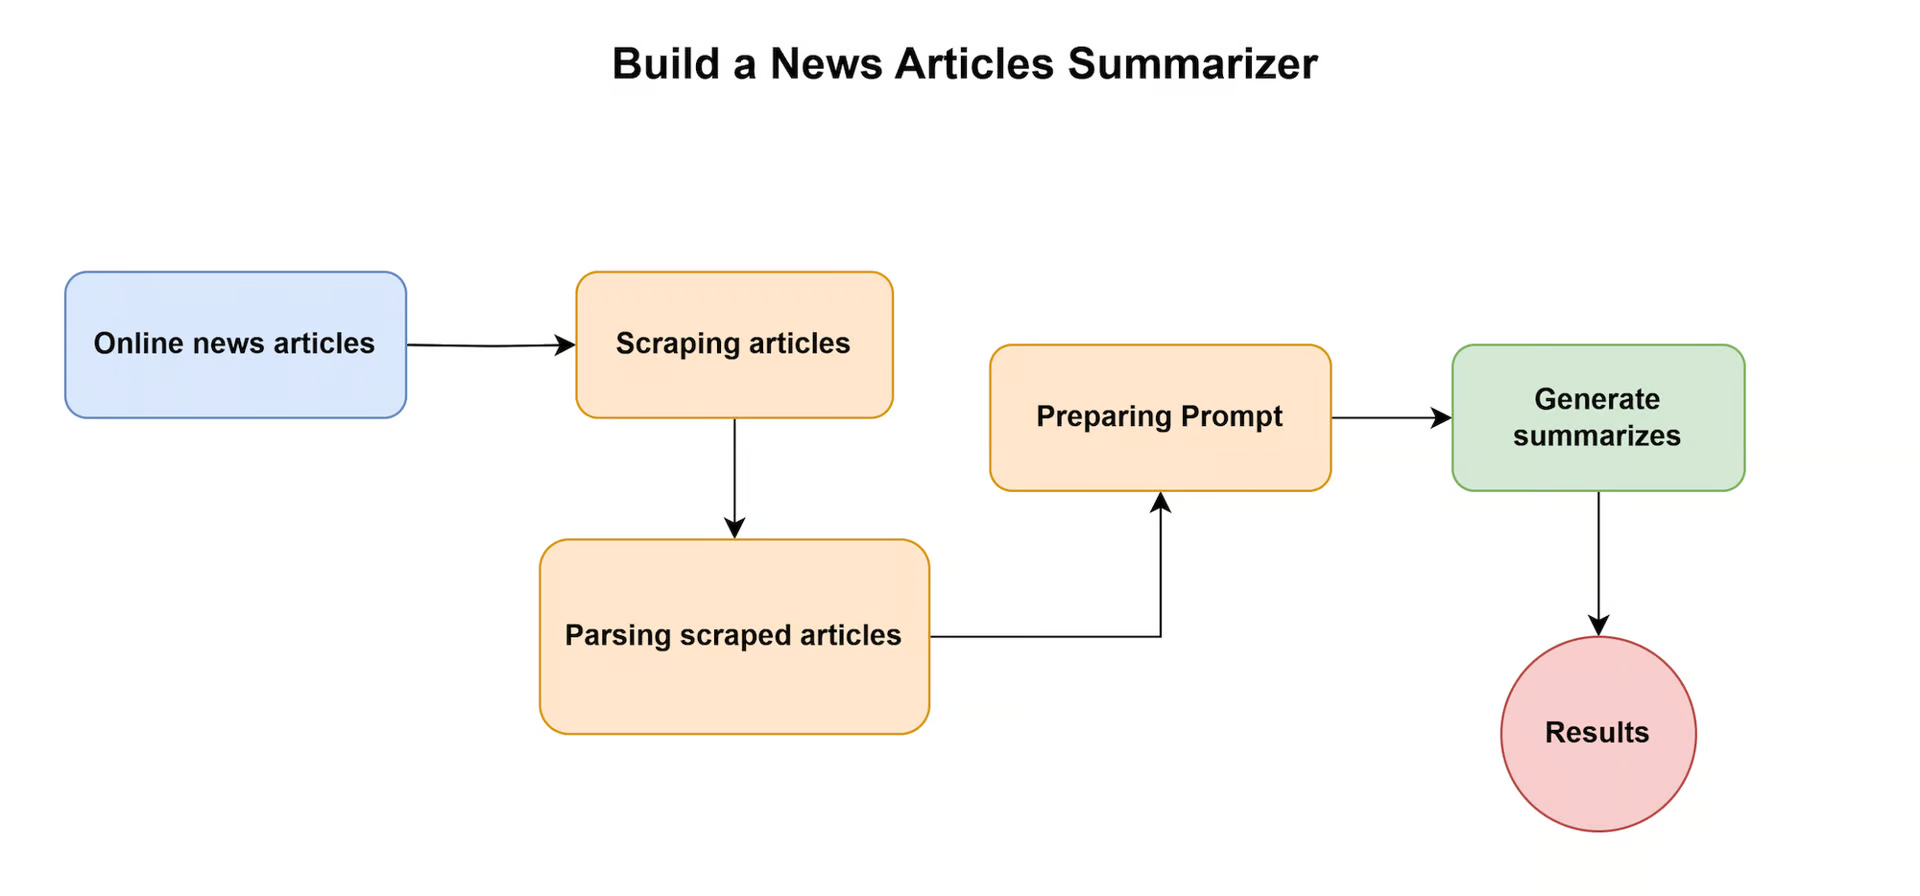

And here are the steps described in more detail:

1. Install required libraries: To get started, ensure you have the necessary libraries installed: requests, newspaper3k, and langchain.
2. Scrape articles: Use the requests library to scrape the content of the target news articles from their respective URLs.
3. Extract titles and text: Employ the newspaper library to parse the scraped HTML and extract the titles and text of the articles.
4. Preprocess the text: Clean and preprocess the extracted texts to make them suitable for input to ChatGPT.
5. Generate summaries: Utilize ChatGPT to summarize the extracted articles' text concisely.
6. Output the results: Present the summaries along with the original titles, allowing users to grasp the main points of each article quickly.

By following this workflow, you can create an efficient News Articles Summarizer that leverages ChatGPT to provide valuable insights in a time-saving manner. Stay informed without spending hours reading through lengthy articles, and enjoy the benefits of AI-powered summarization.

Before you start, obtain your OpenAI API key from the OpenAI website. You need to have an account and be granted access to the API. After logging in, navigate to the API keys section and copy your API key.

Remember to install the required packages with the following command: pip install langchain==0.1.4 deeplake openai==1.10.0 tiktoken. Additionally, the install the newspaper3k package, which has been tested in this lesson with the version 0.2.8.

!pip install -q newspaper3k python-dotenv

In your Python script or notebook, set the API key as an environment variable with OPENAI_API_KEY name. In order to set it from a .env file, you can use the load_dotenv function.

In [1]:
import json 
from dotenv import load_dotenv
load_dotenv()

False

We picked the URL of a news article to generate a summary. The following code fetches articles from a list of URLs using the requests library with a custom User-Agent header. It then extracts the title and text of each article using the newspaper library.

In [2]:
import requests
from newspaper import Article

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}

article_url = "https://www.artificialintelligence-news.com/2022/01/25/meta-claims-new-ai-supercomputer-will-set-records/"

session = requests.Session()

try:
    response = session.get(article_url, headers=headers, timeout=10)
    
    if response.status_code == 200:
        article = Article(article_url)
        article.download()
        article.parse()
        
        print(f"Title: {article.title}")
        print(f"Text: {article.text}")
        
    else:
        print(f"Failed to fetch article at {article_url}")
except Exception as e:
    print(f"Error occurred while fetching article at {article_url}: {e}")

Title: Meta claims its new AI supercomputer will set records
Text: Ryan Daws is a senior editor at TechForge Media with over a decade of experience in crafting compelling narratives and making complex topics accessible. His articles and interviews with industry leaders have earned him recognition as a key influencer by organisations like Onalytica. Under his leadership, publications have been praised by analyst firms such as Forrester for their excellence and performance. Connect with him on X (@gadget_ry) or Mastodon (@gadgetry@techhub.social)

Meta (formerly Facebook) has unveiled an AI supercomputer that it claims will be the world’s fastest.

The supercomputer is called the AI Research SuperCluster (RSC) and is yet to be fully complete. However, Meta’s researchers have already begun using it for training large natural language processing (NLP) and computer vision models.

RSC is set to be fully built in mid-2022. Meta says that it will be the fastest in the world once complete and 

The sample code.

Title: Meta claims its new AI supercomputer will set records
Text: Ryan is a senior editor at TechForge Media with over a decade of experience covering the latest technology and interviewing leading industry figures. He can often be sighted at tech conferences with a strong coffee in one hand and a laptop in the other. If it's geeky, he’s probably into it. Find him on Twitter (@Gadget_Ry) or Mastodon (@gadgetry@techhub.social)

Meta (formerly Facebook) has unveiled an AI supercomputer that it claims will be the world’s fastest.

The supercomputer is called the AI Research SuperCluster (RSC) and is yet to be fully complete. However, Meta’s researchers have already begun using it for training large natural language processing (NLP) and computer vision models.

RSC is set to be fully built in mid-2022. Meta says that it will be the fastest in the world once complete and the aim is for it to be capable of training models with trillions of parameters.

“We hope RSC will help us build entirely new AI systems that can, for example, power real-time voice translations to large groups of people, each speaking a different language, so they can seamlessly collaborate on a research project or play an AR game together,” wrote Meta in a blog post.

“Ultimately, the work done with RSC will pave the way toward building technologies for the next major computing platform — the metaverse, where AI-driven applications and products will play an important role.”

For production, Meta expects RSC will be 20x faster than Meta’s current V100-based clusters. RSC is also estimated to be 9x faster at running the NVIDIA Collective Communication Library (NCCL) and 3x faster at training large-scale NLP workflows.

A model with tens of billions of parameters can finish training in three weeks compared with nine weeks prior to RSC.

Meta says that its previous AI research infrastructure only leveraged open source and other publicly-available datasets. RSC was designed with the security and privacy controls in mind to allow Meta to use real-world examples from its production systems in production training.

What this means in practice is that Meta can use RSC to advance research for vital tasks such as identifying harmful content on its platforms—using real data from them.

“We believe this is the first time performance, reliability, security, and privacy have been tackled at such a scale,” says Meta.

(Image Credit: Meta)

Want to learn more about AI and big data from industry leaders? Check out AI & Big Data Expo. The next events in the series will be held in Santa Clara on 11-12 May 2022, Amsterdam on 20-21 September 2022, and London on 1-2 December 2022.

Explore other upcoming enterprise technology events and webinars powered by TechForge here.

The next code imports essential classes and functions from the LangChain and sets up a ChatOpenAI instance with a temperature of 0 for controlled response generation. Additionally, it imports chat-related message schema classes, which enable the smooth handling of chat-based tasks. The following code will start by setting the prompt and filling it with the article’s content.

In [3]:
from langchain.schema import (
    HumanMessage
)

# we get the article data from the scraping part
article_title = article.title
article_text = article.text

# prepare template for prompt
template = """You are a very good assistant that summarizes online articles.

Here's the article you want to summarize.

==================
Title: {article_title}

{article_text}
==================

Write a summary of the previous article.
"""

prompt = template.format(article_title=article.title, article_text=article.text)

messages = [HumanMessage(content=prompt)]

c:\Users\User\anaconda3\envs\Nate\lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (3.9.10) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


The HumanMessage is a structured data format representing user messages within the chat-based interaction framework. The ChatOpenAI class is utilized to interact with the AI model, while the HumanMessage schema provides a standardized representation of user messages. The template consists of placeholders for the article's title and content, which will be substituted with the actual article_title and article_text. This process simplifies and streamlines the creation of dynamic prompts by allowing you to define a template with placeholders and then replace them with actual data when needed.

In [4]:
from langchain.chat_models import ChatOpenAI

# load the model
chat = ChatOpenAI(model_name="gpt-4", temperature=0)

As we loaded the model and set the temperature to 0. We’d use the chat() instance to generate a summary by passing a single HumanMessage object containing the formatted prompt. The AI model processes this prompt and returns a concise summary:

In [5]:
# generate summary
summary = chat(messages)
print(summary.content)

Meta, formerly known as Facebook, has announced the development of an AI supercomputer, the AI Research SuperCluster (RSC), which it claims will be the world's fastest upon completion in mid-2022. The RSC is already being used by Meta's researchers for training large natural language processing and computer vision models. The supercomputer is expected to be 20 times faster than Meta's current V100-based clusters and will be capable of training models with trillions of parameters. The RSC is designed with security and privacy controls, allowing Meta to use real-world examples from its production systems in training. The company believes this will advance research for tasks such as identifying harmful content on its platforms.


The sample code.

Meta, formerly Facebook, has unveiled an AI supercomputer called the AI Research SuperCluster (RSC) that it claims will be the world's fastest once fully built in mid-2022. The aim is for it to be capable of training models with trillions of parameters and to be used for tasks such as identifying harmful content on its platforms. Meta expects RSC to be 20 times faster than its current V100-based clusters and 9 times faster at running the NVIDIA Collective Communication Library. The supercomputer was designed with security and privacy controls in mind to allow Meta to use real-world examples from its production systems in production training.

The output.

If we want a bulleted list, we can modify a prompt and get the result.

In [6]:
# prepare template for prompt
template = """You are an advanced AI assistant that summarizes online articles into bulleted lists.

Here's the article you need to summarize.

==================
Title: {article_title}

{article_text}
==================

Now, provide a summarized version of the article in a bulleted list format.
"""

# format prompt
prompt = template.format(article_title=article.title, article_text=article.text)

# generate summary
summary = chat([HumanMessage(content=prompt)])
print(summary.content)

- Meta (formerly Facebook) has announced an AI supercomputer, the AI Research SuperCluster (RSC), which it claims will be the world's fastest.
- The RSC is not yet fully built, but researchers have already started using it for training large natural language processing (NLP) and computer vision models.
- The supercomputer is expected to be fully operational by mid-2022 and will be capable of training models with trillions of parameters.
- Meta hopes that the RSC will help build new AI systems that can power real-time voice translations for large groups of people speaking different languages.
- The work done with RSC is expected to contribute to the development of technologies for the next major computing platform, the metaverse.
- Meta expects the RSC to be 20x faster than its current V100-based clusters, 9x faster at running the NVIDIA Collective Communication Library (NCCL), and 3x faster at training large-scale NLP workflows.
- A model with tens of billions of parameters can finish 

The sample code.

- Meta (formerly Facebook) unveils AI Research SuperCluster (RSC), an AI supercomputer claimed to be the world's fastest.
- RSC is not yet complete, but researchers are already using it for training large NLP and computer vision models.
- The supercomputer is set to be fully built in mid-2022 and aims to train models with trillions of parameters.
- Meta hopes RSC will help build new AI systems for real-time voice translations and pave the way for metaverse technologies.
- RSC is expected to be 20x faster than Meta's current V100-based clusters in production.
- A model with tens of billions of parameters can finish training in three weeks with RSC, compared to nine weeks previously.
- RSC is designed with security and privacy controls to allow Meta to use real-world examples from its production systems in training.
- Meta believes this is the first time performance, reliability, security, and privacy have been tackled at such a scale.

The output.

If you want to get the summary in French, you can instruct the model to generate the summary in French language. However, please note that GPT-4's main training language is English and while it has a multilingual capability, the quality may vary for languages other than English. Here's how you can modify the prompt.

In [ ]:
# prepare template for prompt
template = """You are an advanced AI assistant that summarizes online articles into bulleted lists in French.

Here's the article you need to summarize.

==================
Title: {article_title}

{article_text}
==================

Now, provide a summarized version of the article in a bulleted list format, in French.
"""

# format prompt
prompt = template.format(article_title=article.title, article_text=article.text)

# generate summary
summary = chat([HumanMessage(content=prompt)])
print(summary.content)

The sample code.

- Meta (anciennement Facebook) dévoile un superordinateur IA qu'elle prétend être le plus rapide du monde.
- Le superordinateur s'appelle AI Research SuperCluster (RSC) et n'est pas encore totalement achevé.
- Les chercheurs de Meta l'utilisent déjà pour entraîner de grands modèles de traitement du langage naturel (NLP) et de vision par ordinateur.
- RSC devrait être entièrement construit d'ici mi-2022 et être capable d'entraîner des modèles avec des billions de paramètres.
- Meta espère que RSC permettra de créer de nouveaux systèmes d'IA pour des applications telles que la traduction vocale en temps réel pour des groupes de personnes parlant différentes langues.
- RSC devrait être 20 fois plus rapide que les clusters actuels de Meta basés sur V100 pour la production.
- Un modèle avec des dizaines de milliards de paramètres peut terminer son entraînement en trois semaines avec RSC, contre neuf semaines auparavant.
- RSC a été conçu avec la sécurité et la confidentialité à l'esprit, permettant à Meta d'utiliser des exemples réels de ses systèmes de production pour l'entraînement.
- Cela signifie que Meta peut utiliser RSC pour faire progresser la recherche sur des tâches essentielles, comme identifier les contenus nuisibles sur ses plateformes en utilisant des données réelles.

The output.

The solution we've presented here is powerful because it leverages the capabilities of LangChain and GPT-4, a state-of-the-art language model developed by OpenAI, to understand and generate human-like text based on natural language instructions. This allows us to interact with the model as we would with a human, asking it to perform complex tasks, like summarizing an article in a bulleted list format in French, with ease and precision.

The process under the hood of this code is quite fascinating. First, we obtain the article data, including the title and text. We then prepare a template for the prompt we want to give to the AI model. This prompt is designed to simulate a conversation with the model, telling it that it's an "advanced AI assistant" and giving it a specific task - to summarize the article into a bulleted list in French.

Once the template is ready, we load the GPT-4 model using ChatOpenAI class with a certain temperature setting, which influences the randomness of the model's outputs. We then format the prompt using the article data.

The core part of the process is when we pass the formatted prompt to the model. The model parses the prompt, understands the task, and generates a summary accordingly. It uses its vast knowledge, trained on diverse internet text, to comprehend and summarize the article in French.

Lastly, the generated summary, which is a response from the model, is printed. The summary is expected to be a concise, bullet-point version of the article in French, just as we instructed the model in the prompt.

In essence, we are guiding the model using natural language instructions to generate the desired output. This interaction is akin to how we might ask a human assistant to perform a task, making it a powerful and intuitive solution for a variety of applications.

## Conclusion
In conclusion, we've illustrated the process of creating a robust News Articles Summarizer utilizing the capabilities of ChatGPT and LangChain. This potent tool simplifies the task of staying informed by extracting and condensing vital information from a myriad of articles into accessible, AI-generated summaries. The process has been further enriched by converting these summaries into bulleted lists, enhancing readability and comprehension.

In response to the requirements of a multilingual audience, we've also expanded the scope of our summarizer to provide summaries in different languages, French being our exemplary case. This showcases the potential of our tool to cater to a diverse, global audience.

The crux of this article is the workflow we've outlined - a step-by-step guide that empowers you to construct your own summarizer. With this, you can streamline your information consumption process, save considerable time, and stay abreast with the latest news and developments.

We've also delved into the intricacies of prompt construction. A well-crafted prompt ensures that the model understands the task, which in our case, involved summarizing an article into a bulleted list and in a different language. By comprehending the nuances of prompt design, you can further tweak the model to generate outputs that suit your unique needs.

In the next lesson, we’ll see more about open-source LLMs and how some of them can be used locally.